In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
# Enable inline plotting
%matplotlib inline

## Data Preparation

In [2]:
# Read FSP data for Garissa
FSP_Garissa = pd.read_csv('datasets/Financial_Service_Providers_Garissa.csv', index_col='Serial Number')
# Drop and rename columns
FSP_Garissa.drop(['Form Name'], axis=1, inplace=True)
FSP_Garissa.columns = ['Latitude', 'Longitude', 'FSP_Type', 'Region', 'Address']
# Format FSP type
FSP_Garissa['FSP_Type'] = FSP_Garissa['FSP_Type'].str.title()
FSP_Garissa['FSP_Type'] = FSP_Garissa['FSP_Type'].str.replace('And', 'and')
#Construct a Geodata frame
FSP_crs = {'init': 'epsg:4326'}
FSP_Garissa['geometry'] = FSP_Garissa.apply(lambda x: Point(float(x['Longitude']), float(x['Latitude'])), axis=1)
FSP_geo = gpd.GeoDataFrame(FSP_Garissa, crs = FSP_crs, geometry = FSP_Garissa['geometry'])
# Print out the first rows of the Geodata frame
FSP_geo.head()

,Latitude,Longitude,FSP_Type,Region,Address,geometry
Serial Number,,,,,,
21153,-1.69345,40.16992,Commercial Banks and Mortgage Finance Company,Garisa town,Masalani Primary Road,POINT (40.16992 -1.69345)
21182,-1.69448,40.17062,Bank Agent,Garisa town,Ijara,POINT (40.17062 -1.69448)
21208,-1.69491,40.16995,Mobile Money Service Provider,Garisa town,Hulugho Street,POINT (40.16995 -1.69491)
21235,-1.69485,40.16984,Mobile Money Service Provider,Garisa town,Hulugho Street,POINT (40.16984 -1.69485)
21263,-1.69516,40.16878,Bank Agent,Garisa town,Hulugho Street,POINT (40.16878 -1.69516)


In [3]:
# Read in the Garissa shapefile with sub-counties
Garissa_sub = gpd.read_file('shapefiles\Garissa.shp')
# Clean-up the data 
Garissa_sub.drop(['FGT0', 'CONTRIBUTI', 'Area', 'Shape_Leng', 'Shape_Area'] , axis=1, inplace=True)
Garissa_sub.columns = ['Code', 'Population', 'Poor_People', 'Former_Province', 'Sub_County', 'geometry']
Garissa_sub['Code'] = Garissa_sub.Code.astype(int)
Garissa_sub['Population'] = Garissa_sub.Population.astype(int)
Garissa_sub['Poor_People'] = Garissa_sub.Poor_People.astype(int)
Garissa_sub['Former_Province'] = Garissa_sub.Former_Province.str.title()
Garissa_sub['Sub_County'] = Garissa_sub.Sub_County.str.title()
Garissa_sub.set_index('Code', inplace=True)
# Print the firs rows of the Garissa shapefile
Garissa_sub.head()

,Population,Poor_People,Former_Province,Sub_County,geometry
Code,,,,,
30,96440,57643,North Eastern,Dujis,POLYGON ((38.93363230500006 -0.101585113999931...
31,74082,47513,North Eastern,Lagdera,POLYGON ((38.81871009600007 0.3504040300000497...
32,46135,28436,North Eastern,Fafi,POLYGON ((40.79647810400007 -1.302535079999927...
33,35939,22612,North Eastern,Ijara,POLYGON ((40.85146932300006 -1.740024735999953...


In [4]:
# Calculate area in sq. km.
print(Garissa_sub.crs)
Garissa_sub.geometry = Garissa_sub.geometry.to_crs(epsg = 3857)
Garissa_sub['Area_sqkm'] = Garissa_sub.geometry.area / 10**6
Garissa_sub.geometry = Garissa_sub.geometry.to_crs(epsg = 4326)
# Print first rows of the Garissa shapefile
Garissa_sub.head()

{'init': 'epsg:4326'}


,Population,Poor_People,Former_Province,Sub_County,geometry,Area_sqkm
Code,,,,,,
30,96440,57643,North Eastern,Dujis,POLYGON ((38.93363230500006 -0.101585113999936...,5653.218952
31,74082,47513,North Eastern,Lagdera,POLYGON ((38.81871009600007 0.3504040300000331...,13394.946679
32,46135,28436,North Eastern,Fafi,POLYGON ((40.79647810400006 -1.302535079999926...,19810.008462
33,35939,22612,North Eastern,Ijara,POLYGON ((40.85146932300007 -1.740024735999958...,6126.129572


In [5]:
# Read FSP data for Kenya
FSP_Kenya = pd.read_csv('datasets/Financial_Service_Providers_Kenya.csv', index_col='Serial Number')
# Clean-up the data
FSP_Kenya.drop(['Form Name'], axis=1, inplace=True)
FSP_Kenya.columns = ['Latitude', 'Longitude', 'FSP_Type', 'Region', 'Address']
FSP_Kenya['FSP_Type'] = FSP_Kenya['FSP_Type'].str.title()
FSP_Kenya['FSP_Type'] = FSP_Kenya['FSP_Type'].str.replace('And', 'and')
# Construct a Geodata Frame
FSP_crs = {'init': 'epsg:4326'}
FSP_Kenya['geometry'] = FSP_Kenya.apply(lambda x: Point(float(x['Longitude']), float(x['Latitude'])), axis=1)
FSP_Kenya = gpd.GeoDataFrame(FSP_Kenya, crs = FSP_crs, geometry = FSP_Kenya['geometry'])
# Print out the first rows of the Geodata frame
FSP_Kenya.head()

,Latitude,Longitude,FSP_Type,Region,Address,geometry
Serial Number,,,,,,
1,-0.42204,36.95041,Pension Provider,Nyeri town,Kimathi Way,POINT (36.95041 -0.42204)
2,0.05891,37.64377,Mobile Money Service Provider,Meru town,Makutano,POINT (37.64377 0.05891)
3,-4.06168,39.66910,Mobile Money Service Provider,Mombasa town,Port Way,POINT (39.6691 -4.06168)
4,-1.21601,36.90345,Mobile Money Service Provider,Nairobi towns,Kasarani,POINT (36.90345 -1.21601)
5,-1.29497,36.79969,Insurance Service Provider,Nairobi towns,Argwings Kodhek,POINT (36.79969000000001 -1.29497)


In [6]:
# Read in the Kenya Counties shapefile
Counties = gpd.read_file('shapefiles\Census2009.shp')
# Clean-up the data 
Counties.drop(['Shape_Leng', 'Shape_Area'], axis=1, inplace=True)
Counties.columns = ['Name', 'Area', 'Male', 'Female', 'Population', 'Households', 'geometry']
# Print first rows of the Kenya Counties shapefile
Counties.head()

,Name,Area,Male,Female,Population,Households,geometry
0,Turkana,68680.11,445071,410328,855399,123191,"POLYGON ((35.80163192737172 5.344852924722886,..."
1,Marsabit,70961.19,151110,140056,291166,56941,"POLYGON ((36.05060958836197 4.456217766237103,..."
2,Mandera,25991.47,559938,465818,1025756,125497,"POLYGON ((41.62132644625865 3.97673463779347, ..."
3,Wajir,56685.75,363775,298166,661941,88574,"POLYGON ((39.31811523443071 3.47196984263428, ..."
4,West Pokot,9169.45,254826,257864,512690,93777,"POLYGON ((35.12761688241335 2.623016119198724,..."


## Visualizing with GeoPandas

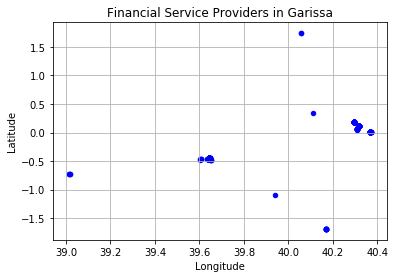

In [7]:
# Create Matplotlib scatter plot
FSP_Garissa.plot(kind='Scatter', x='Longitude', y='Latitude', c='blue')
plt.title('Financial Service Providers in Garissa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

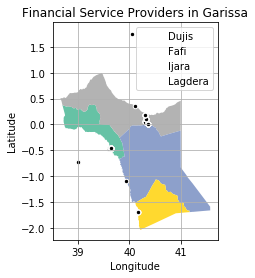

In [8]:
# Plot Garissa sub-counties
ax = Garissa_sub.plot(column='Sub_County', cmap='Set2', legend=True)
# Plot Garissa FSPs
FSP_Garissa.plot(ax = ax, kind='Scatter', x='Longitude', y='Latitude', c='black', edgecolor='white')
plt.title('Financial Service Providers in Garissa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

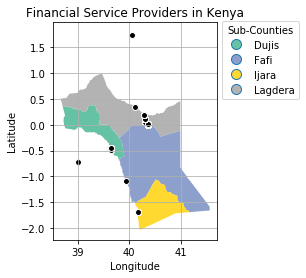

In [9]:
# Define legend
lgnd_kwds = {'title': 'Sub-Counties',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
# Plot Garissa sub-counties
ax = Garissa_sub.plot(column='Sub_County', cmap='Set2', legend=True, legend_kwds = lgnd_kwds)
# Plot Garissa FSPs
FSP_geo.plot(ax = ax, c='black', edgecolor='white')
plt.title('Financial Service Providers in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

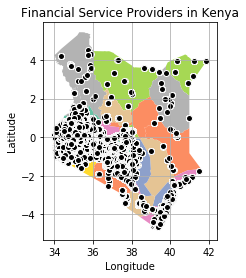

In [10]:
# Plot Kenya Counties
ax = Counties.plot(column='Name', cmap='Set2')
# Plot Kenya FSPs
FSP_Kenya.plot(ax = ax, c='black', edgecolor='white')
plt.title('Financial Service Providers in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

## Spatial Analysis with GeoPandas

In [11]:
# Calculate no. of FSPs by sub-county
within_SubCounty = gpd.sjoin(FSP_geo, Garissa_sub, op = 'within')
within_groupby = within_SubCounty[['Sub_County', 'FSP_Type']].groupby('Sub_County') \
    .agg('count').sort_values(by = 'FSP_Type', ascending = False)
# Print results
within_groupby

C:\Users\User-pc\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,FSP_Type
Sub_County,
Dujis,95
Lagdera,71
Fafi,35


In [12]:
# Calculate no. of FSPs by sub-county
FSP_within_County = gpd.sjoin(FSP_Kenya, Counties, op = 'within')
FSP_within_County.head()
FSP_by_County = FSP_within_County[['Name', 'FSP_Type']].groupby('Name') \
    .agg('count').sort_values(by = 'FSP_Type', ascending = False)
# Print results
FSP_by_County

,FSP_Type
Name,
Nairobi,15044
Kiambu,5324
Nakuru,3333
Kajiado,2305
Machakos,2091
Uasin Gishu,2075
Mombasa,2069
Nyeri,1615
Meru,1559


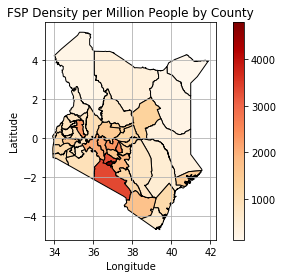

In [13]:
# Add no. of FSPs to Kenya Counties
Counties_FSP = pd.merge(Counties, FSP_by_County, on='Name')
# Calculate FSP density per sq km
Counties_FSP['FSP_Density'] = Counties_FSP.apply(lambda row: 10**6 * row.FSP_Type / row.Population, axis=1)
# Plot choropleth of FSP density 
Counties_FSP.plot(column='FSP_Density', cmap = 'OrRd', edgecolor='black', legend=True)
plt.title('FSP Density per Million People by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

## Geovisualization with Folium

In [14]:
# Calculate center point
Garissa = Garissa_sub[['Former_Province', 'geometry']]
Garissa = Garissa.dissolve(by='Former_Province')
Garissa['Center'] = Garissa.geometry.centroid
center = Garissa.Center[0]
county_center = [center.y, center.x]
# Initiate OSM map
Basic_map = folium.Map(location=county_center, zoom_start=8)
# Plot Geodata frames
folium.GeoJson(Garissa_sub.geometry).add_to(Basic_map)
folium.GeoJson(FSP_geo.geometry).add_to(Basic_map)
# Display map
Basic_map

In [15]:
# Create Garissa map
Garissa_map = folium.Map(location = county_center, zoom_start=8)
# Add population choropleth  
folium.Choropleth(
    geo_data=Garissa_sub, 
    data=Garissa_sub, 
    columns=['Sub_County', 'Population'], 
    key_on='feature.properties.Sub_County', 
    fill_color='BuPu',
    legend_name='Population'
).add_to(Garissa_map)
# Add FSP markers and pop-ups
for row in FSP_geo.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = popup = '<strong>' + row_values['FSP_Type'] + '</strong>'
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(Garissa_map)
# Display Garissa map
Garissa_map

In [16]:
# Import MarkerCluster plugin
from folium.plugins import MarkerCluster
# Create Garissa map
Garissa_cluster = folium.Map(location = county_center, zoom_start=8)
# Add population choropleth  
folium.Choropleth(
    geo_data=Garissa_sub, 
    data=Garissa_sub, 
    columns=['Sub_County', 'Population'], 
    key_on='feature.properties.Sub_County', 
    fill_color='BuPu',
    legend_name='Population'
).add_to(Garissa_cluster)
# Add FSP markers and pop-ups
mc = MarkerCluster()
for row in FSP_geo.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = popup = '<strong>' + row_values['FSP_Type'] + '</strong>'
    marker = folium.Marker(location = location, popup = popup)
    mc.add_child(folium.Marker(location=location, popup = popup))
# Display Garissa map
Garissa_cluster.add_child(mc)
Garissa_cluster.save('Garissa_cluster.html')

In [17]:
# Center map
Kenya_mc = [0.6059,37.8173]
Kenya_map = folium.Map(location=Kenya_mc, zoom_start=6)
# Add FSP density choropleth
folium.Choropleth(
    geo_data=Counties_FSP,
    data=Counties_FSP,
    columns=['Name', 'FSP_Density'],
    key_on='feature.properties.Name',
    fill_color='BuPu',
    legend_name='Financial Service Providers per Million People'
).add_to(Kenya_map)
# Display Kenya map
Kenya_map

In [18]:
# Add County centroid
Counties_FSP['center'] = Counties_FSP.geometry.centroid
# Add markers and pop-ups
for row in Counties_FSP.iterrows():
    row_values = row[1] 
    center_point = row_values['center']
    location = [center_point.y, center_point.x]
    popup = ('<strong>' + str(row_values['Name']) + '</strong>' + ' has an FSP density of ' 
             + '<strong>' + str(round(row_values['FSP_Density'])) + '</strong>')
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(Kenya_map)
# Add layer control
folium.LayerControl().add_to(Kenya_map)
# Display Kenya map
Kenya_map